<a href="https://colab.research.google.com/github/fsafarkhani/Intro-to-AI-and-Machine-Learning/blob/main/7ml_algorithms_comparison_on_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

bc = load_breast_cancer()

In [ ]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

#DATASET iNFO

In [ ]:
bc.target[0] #does this guy has cancer? 0= no 1 = yes


0

In [ ]:
bc.target.shape # we havve 569 labels

(569,)

In [ ]:
bc.data.shape


(569, 30)

#Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)


In [ ]:
print(f"feature=> train:{X_train.shape} - test:{X_test.shape}")
print(f"Label=> train{y_train.shape} - test:{y_test.shape}")


feature=> train:(455, 30) - test:(114, 30)
Label=> train(455,) - test:(114,)


In [ ]:
X_train[0] # our data is not between 0 and 1 . so we should normalize our data.

array([2.020e+01, 2.683e+01, 1.337e+02, 1.234e+03, 9.905e-02, 1.669e-01,
       1.641e-01, 1.265e-01, 1.875e-01, 6.020e-02, 9.761e-01, 1.892e+00,
       7.128e+00, 1.036e+02, 8.439e-03, 4.674e-02, 5.904e-02, 2.536e-02,
       3.710e-02, 4.286e-03, 2.419e+01, 3.381e+01, 1.600e+02, 1.671e+03,
       1.278e-01, 3.416e-01, 3.703e-01, 2.152e-01, 3.271e-01, 7.632e-02])

#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
X_train[0]

array([0.64675376, 0.57896517, 0.62825798, 0.46256628, 0.41906653,
       0.50517088, 0.38448922, 0.62872763, 0.41161616, 0.21101695,
       0.35499897, 0.3385343 , 0.35606103, 0.18079634, 0.2286433 ,
       0.42716135, 0.14909091, 0.48039401, 0.54533577, 0.11715932,
       0.57844184, 0.58075693, 0.54579411, 0.36516909, 0.37396817,
       0.30494513, 0.29576677, 0.7413021 , 0.33629016, 0.13957759])

#Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test,y_pred_train,y_pred_test):

    acc_train = accuracy_score(y_true=y_train,y_pred= y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred= y_pred_test)

    p=precision_score(y_true=y_test,y_pred= y_pred_test)
    r=recall_score(y_true=y_test,y_pred= y_pred_test)

    print(f"acc train:{acc_train} - acc test:{acc_test} - precision: {p} - recall: {r}")

    return acc_train, acc_test, p, r




#1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test,y_pred_train,y_pred_test)

acc train:0.945054945054945 - acc test:0.9385964912280702 - precision: 0.9342105263157895 - recall: 0.9726027397260274


#2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm="kd_tree", leaf_size=28)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [ ]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test,y_pred_train,y_pred_test)

acc train:0.9758241758241758 - acc test:0.9912280701754386 - precision: 0.9864864864864865 - recall: 1.0


#3. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion="gini")
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=64)

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test,y_pred_train,y_pred_test)

acc train:1.0 - acc test:0.9035087719298246 - precision: 0.9696969696969697 - recall: 0.8767123287671232


#4.Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test,y_pred_train,y_pred_test)

acc train:0.9934065934065934 - acc test:0.9649122807017544 - precision: 0.9859154929577465 - recall: 0.958904109589041


#SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)


SVC(kernel='poly')

In [ ]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_rf, r_rf = calculate_metrics(y_train, y_test,y_pred_train,y_pred_test)

acc train:0.9846153846153847 - acc test:0.9736842105263158 - precision: 0.972972972972973 - recall: 0.9863013698630136


#6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
x_pred_train = lr.predict(X_train)
x_pred_test = lr.predict(X_test)
acc_train_ir, acc_test_ir, p_ir, r_ir = calculate_metrics(y_train, y_test,y_pred_train,y_pred_test)

acc train:0.9846153846153847 - acc test:0.9736842105263158 - precision: 0.972972972972973 - recall: 0.9863013698630136


#7. ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

ann= MLPClassifier(hidden_layer_sizes=1024,activation="relu", solver ="adam" )
ann.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=1024)

In [ ]:
y_pred_train=ann.predict(X_train)
y_pred_test=ann.predict(X_test)
acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9868131868131869 - acc test:0.9912280701754386 - precision: 0.9864864864864865 - recall: 1.0


#Comparison

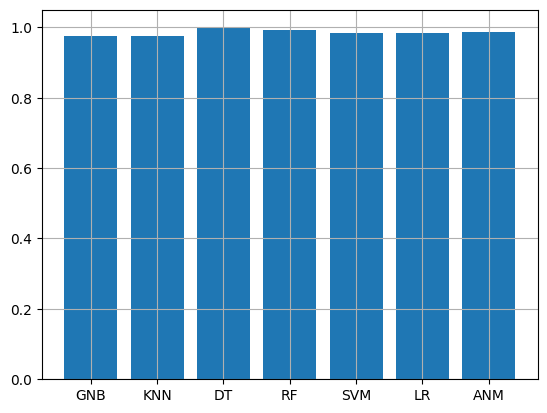

In [ ]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_ir, acc_train_ann]
title = ["GNB", "KNN","DT","RF","SVM", "LR","ANM"]

plt.bar(title, acc_train)
plt.grid()
plt.show()


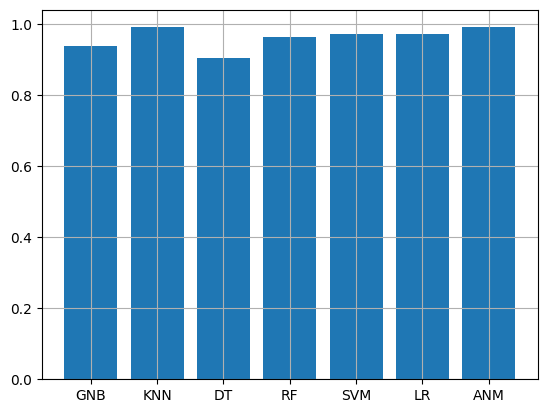

In [ ]:
import matplotlib.pyplot as plt

acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_ir, acc_test_ann]
title = ["GNB", "KNN","DT","RF","SVM", "LR","ANM"]

plt.bar(title, acc_test)
plt.grid()
plt.show()
